# **Analysis of Foreign Visitor Distribution by Year and Airport in India**

## **Import the required library**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

## **Importing csv files**

In [5]:
base_path = r"D:\Users\sanke\Downloads\archive"
cairp = pd.read_csv(f'{base_path}\\Country Wise Airport.csv')
cyv = pd.read_csv(f'{base_path}\\Country Wise Yearly VIsitors.csv')

### ***The dataset has been thoroughly cleaned and finalized, ensuring accuracy and consistency, and is now ready for visualizing country-wise airport analysis.*** 

In [7]:
cairp.head(5)

,Country of Nationality,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2019 Hyderabad (Airport),2019 Cochin (Airport),2020 Delhi (Airport),2020 Mumbai (Airport),2020 Chennai (Airport),2020 Calicut (Airport),2020 Benguluru (Airport),2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport)
0,Canada,21.1,1.3,6.0,53.5,4.4,2.8,10.9,0,19.7,...,3.3,2.8,71.7,10.5,2.6,0.2,3.9,0.5,2.6,2.5
1,United States Of America,25.8,2.0,8.3,31.1,10.2,8.9,13.7,0,23.9,...,13.7,2.6,40.1,22.3,7.1,0.1,8.7,1.9,11.7,2.0
2,Argentina,18.7,3.0,4.1,57.1,5.7,1.5,9.9,0,17.3,...,3.5,1.1,30.4,34.7,6.4,0.0,11.5,2.0,3.7,5.3
3,Brazil,22.0,2.6,5.6,49.0,10.1,2.8,7.9,0,20.6,...,6.2,3.3,32.8,46.1,4.4,0.1,4.5,0.6,3.1,2.6
4,Mexico,14.7,2.1,6.1,62.8,5.7,1.9,6.7,0,15.8,...,1.6,1.1,36.8,36.3,7.2,0.1,12.1,1.5,2.8,0.5


In [8]:
# Convert all columns except the first ('Country of Nationality') to numeric
# Skip the header row, so the conversion starts with the data rows
for col in cairp.columns[1:]:  # Skip the first column
    cairp[col] = pd.to_numeric(cairp[col], errors='coerce')

In [9]:
cairp.head(5)

,Country of Nationality,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2019 Hyderabad (Airport),2019 Cochin (Airport),2020 Delhi (Airport),2020 Mumbai (Airport),2020 Chennai (Airport),2020 Calicut (Airport),2020 Benguluru (Airport),2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport)
0,Canada,21.1,1.3,6.0,53.5,4.4,2.8,10.9,0,19.7,...,3.3,2.8,71.7,10.5,2.6,0.2,3.9,0.5,2.6,2.5
1,United States Of America,25.8,2.0,8.3,31.1,10.2,8.9,13.7,0,23.9,...,13.7,2.6,40.1,22.3,7.1,0.1,8.7,1.9,11.7,2.0
2,Argentina,18.7,3.0,4.1,57.1,5.7,1.5,9.9,0,17.3,...,3.5,1.1,30.4,34.7,6.4,0.0,11.5,2.0,3.7,5.3
3,Brazil,22.0,2.6,5.6,49.0,10.1,2.8,7.9,0,20.6,...,6.2,3.3,32.8,46.1,4.4,0.1,4.5,0.6,3.1,2.6
4,Mexico,14.7,2.1,6.1,62.8,5.7,1.9,6.7,0,15.8,...,1.6,1.1,36.8,36.3,7.2,0.1,12.1,1.5,2.8,0.5


In [10]:
#Check for null values
cairp.isnull().sum()

Country of Nationality      0
2014 Delhi (Airport)        1
 2014 Mumbai (Airport)      1
 2014 Chennai (Airport)     1
2014 Calicut (Airport)      1
2014 Benguluru (Airport)    1
2014 Kolkata (Airport)      1
2014 Hyderabad (Airport)    1
2014 Cochin (Airport)       0
2015 Delhi (Airport)        1
 2015 Mumbai (Airport)      1
 2015 Chennai (Airport)     1
2015 Calicut (Airport)      1
2015 Benguluru (Airport)    1
2015 Kolkata (Airport)      1
2015 Hyderabad (Airport)    1
2015 Cochin (Airport)       0
2016 Delhi (Airport)        1
 2016 Mumbai (Airport)      1
 2016 Chennai (Airport)     1
2016 Calicut (Airport)      0
2016 Benguluru (Airport)    0
2016 Kolkata (Airport)      1
2016 Hyderabad (Airport)    1
2016 Cochin (Airport)       3
2017 Delhi (Airport)        0
 2017 Mumbai (Airport)      1
 2017 Chennai (Airport)     0
2017 Calicut (Airport)      0
2017 Benguluru (Airport)    0
2017 Kolkata (Airport)      0
2017 Hyderabad (Airport)    0
2017 Cochin (Airport)       5
2018 Delhi

In [11]:
# All the null values filled with 0
cairp = cairp.fillna(0)

In [12]:
# Check again is there any null value or not
cairp.isnull().sum()

Country of Nationality      0
2014 Delhi (Airport)        0
 2014 Mumbai (Airport)      0
 2014 Chennai (Airport)     0
2014 Calicut (Airport)      0
2014 Benguluru (Airport)    0
2014 Kolkata (Airport)      0
2014 Hyderabad (Airport)    0
2014 Cochin (Airport)       0
2015 Delhi (Airport)        0
 2015 Mumbai (Airport)      0
 2015 Chennai (Airport)     0
2015 Calicut (Airport)      0
2015 Benguluru (Airport)    0
2015 Kolkata (Airport)      0
2015 Hyderabad (Airport)    0
2015 Cochin (Airport)       0
2016 Delhi (Airport)        0
 2016 Mumbai (Airport)      0
 2016 Chennai (Airport)     0
2016 Calicut (Airport)      0
2016 Benguluru (Airport)    0
2016 Kolkata (Airport)      0
2016 Hyderabad (Airport)    0
2016 Cochin (Airport)       0
2017 Delhi (Airport)        0
 2017 Mumbai (Airport)      0
 2017 Chennai (Airport)     0
2017 Calicut (Airport)      0
2017 Benguluru (Airport)    0
2017 Kolkata (Airport)      0
2017 Hyderabad (Airport)    0
2017 Cochin (Airport)       0
2018 Delhi

In [13]:
#The column name 'Country of Nationality' has been renamed to 'Country' to facilitate merging the current dataset with the 'Yearly Visitors' file. 
#This allows for the calculation of the 'Number of Visitors' by converting the 'Percentage' data.
cairp=cairp.rename(columns = {'Country of Nationality':'Country'})

In [14]:
cairp.head(5)

,Country,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2019 Hyderabad (Airport),2019 Cochin (Airport),2020 Delhi (Airport),2020 Mumbai (Airport),2020 Chennai (Airport),2020 Calicut (Airport),2020 Benguluru (Airport),2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport)
0,Canada,21.1,1.3,6.0,53.5,4.4,2.8,10.9,0,19.7,...,3.3,2.8,71.7,10.5,2.6,0.2,3.9,0.5,2.6,2.5
1,United States Of America,25.8,2.0,8.3,31.1,10.2,8.9,13.7,0,23.9,...,13.7,2.6,40.1,22.3,7.1,0.1,8.7,1.9,11.7,2.0
2,Argentina,18.7,3.0,4.1,57.1,5.7,1.5,9.9,0,17.3,...,3.5,1.1,30.4,34.7,6.4,0.0,11.5,2.0,3.7,5.3
3,Brazil,22.0,2.6,5.6,49.0,10.1,2.8,7.9,0,20.6,...,6.2,3.3,32.8,46.1,4.4,0.1,4.5,0.6,3.1,2.6
4,Mexico,14.7,2.1,6.1,62.8,5.7,1.9,6.7,0,15.8,...,1.6,1.1,36.8,36.3,7.2,0.1,12.1,1.5,2.8,0.5


In [15]:
cyv.head()

,Country,2014,2015,2016,2017,2018,2019,2020
0,Canada,268485,281306,317239,335439,351040,351859,122868
1,U.S.A,1118983,1213624,1296939,1376919,1456678,1512032,394092
2,Argentina,9731,9351,12308,14875,16345,12844,4294
3,Brazil,19563,20610,21289,24453,26579,25422,8092
4,Mexico,13978,14049,15689,18114,19909,20766,4580


In [16]:
# Convert all columns except the first ('Country') to numeric
# Skip the header row, so the conversion starts with the data rows
for col in cyv.columns[1:]:  # Skip the first column
    cyv[col] = pd.to_numeric(cyv[col], errors='coerce')

In [17]:
cyv.isnull().sum()

Country    0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64

In [18]:
cairp_updated = pd.merge(cairp, cyv, on='Country', how='inner')

# Display the first few rows of the merged DataFrame
cairp_updated.head()

,Country,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport),2014,2015,2016,2017,2018,2019,2020
0,Canada,21.1,1.3,6.0,53.5,4.4,2.8,10.9,0,19.7,...,0.5,2.6,2.5,268485,281306,317239,335439,351040,351859,122868
1,Argentina,18.7,3.0,4.1,57.1,5.7,1.5,9.9,0,17.3,...,2.0,3.7,5.3,9731,9351,12308,14875,16345,12844,4294
2,Brazil,22.0,2.6,5.6,49.0,10.1,2.8,7.9,0,20.6,...,0.6,3.1,2.6,19563,20610,21289,24453,26579,25422,8092
3,Mexico,14.7,2.1,6.1,62.8,5.7,1.9,6.7,0,15.8,...,1.5,2.8,0.5,13978,14049,15689,18114,19909,20766,4580
4,Austria,14.6,1.7,6.2,54.7,6.3,1.0,15.5,0,14.8,...,1.9,2.4,3.9,34360,33670,33089,31832,33200,32332,9182


In [19]:
cairp_updated.columns

Index(['Country', '2014 Delhi (Airport)', ' 2014 Mumbai (Airport)',
       ' 2014 Chennai (Airport)', '2014 Calicut (Airport)',
       '2014 Benguluru (Airport)', '2014 Kolkata (Airport)',
       '2014 Hyderabad (Airport)', '2014 Cochin (Airport) ',
       '2015 Delhi (Airport)', ' 2015 Mumbai (Airport)',
       ' 2015 Chennai (Airport)', '2015 Calicut (Airport)',
       '2015 Benguluru (Airport)', '2015 Kolkata (Airport)',
       '2015 Hyderabad (Airport)', '2015 Cochin (Airport)',
       '2016 Delhi (Airport)', ' 2016 Mumbai (Airport)',
       ' 2016 Chennai (Airport)', '2016 Calicut (Airport)',
       '2016 Benguluru (Airport)', '2016 Kolkata (Airport)',
       '2016 Hyderabad (Airport)', '2016 Cochin (Airport)',
       '2017 Delhi (Airport)', ' 2017 Mumbai (Airport)',
       ' 2017 Chennai (Airport)', '2017 Calicut (Airport)',
       '2017 Benguluru (Airport)', '2017 Kolkata (Airport)',
       '2017 Hyderabad (Airport)', '2017 Cochin (Airport)',
       '2018 Delhi (Airport)', ' 201

In [20]:
cairp_updated.columns = cairp_updated.columns.str.strip()

In [21]:
cairp_updated.columns

Index(['Country', '2014 Delhi (Airport)', '2014 Mumbai (Airport)',
       '2014 Chennai (Airport)', '2014 Calicut (Airport)',
       '2014 Benguluru (Airport)', '2014 Kolkata (Airport)',
       '2014 Hyderabad (Airport)', '2014 Cochin (Airport)',
       '2015 Delhi (Airport)', '2015 Mumbai (Airport)',
       '2015 Chennai (Airport)', '2015 Calicut (Airport)',
       '2015 Benguluru (Airport)', '2015 Kolkata (Airport)',
       '2015 Hyderabad (Airport)', '2015 Cochin (Airport)',
       '2016 Delhi (Airport)', '2016 Mumbai (Airport)',
       '2016 Chennai (Airport)', '2016 Calicut (Airport)',
       '2016 Benguluru (Airport)', '2016 Kolkata (Airport)',
       '2016 Hyderabad (Airport)', '2016 Cochin (Airport)',
       '2017 Delhi (Airport)', '2017 Mumbai (Airport)',
       '2017 Chennai (Airport)', '2017 Calicut (Airport)',
       '2017 Benguluru (Airport)', '2017 Kolkata (Airport)',
       '2017 Hyderabad (Airport)', '2017 Cochin (Airport)',
       '2018 Delhi (Airport)', '2018 Mumbai (

In [22]:
years = ['2014', '2015', '2016', '2017', '2018', '2019', '2020']

# Create a copy of the original data for manipulation
new_cairp = cairp_updated.copy()

# Loop through each year and multiply each airport percentages by the yearly total
for year in years:
    # Define each airport columns for the current year
    total_airport = [f'{year} Delhi (Airport)', f'{year} Mumbai (Airport)', f'{year} Benguluru (Airport)', 
                     f'{year} Kolkata (Airport)', f'{year} Hyderabad (Airport)', f'{year} Cochin (Airport)']
    
    # Check if all airports columns exist in the DataFrame
    existing_airport = [col for col in total_airport if col in cairp_updated.columns]
    
    # Multiply each airport's percentage by the respective yearly total
    for Airport in existing_airport:
        new_cairp[Airport] = cairp_updated[Airport] * cairp_updated[year] / 100

# Display the updated DataFrame with calculated values
new_cairp.head()

,Country,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport),2014,2015,2016,2017,2018,2019,2020
0,Canada,56650.335,3490.305,6.0,53.5,11813.340,7517.580,29264.865,0.0,55417.282,...,614.340,3194.568,3071.700,268485,281306,317239,335439,351040,351859,122868
1,Argentina,1819.697,291.930,4.1,57.1,554.667,145.965,963.369,0.0,1617.723,...,85.880,158.878,227.582,9731,9351,12308,14875,16345,12844,4294
2,Brazil,4303.860,508.638,5.6,49.0,1975.863,547.764,1545.477,0.0,4245.660,...,48.552,250.852,210.392,19563,20610,21289,24453,26579,25422,8092
3,Mexico,2054.766,293.538,6.1,62.8,796.746,265.582,936.526,0.0,2219.742,...,68.700,128.240,22.900,13978,14049,15689,18114,19909,20766,4580
4,Austria,5016.560,584.120,6.2,54.7,2164.680,343.600,5325.800,0.0,4983.160,...,174.458,220.368,358.098,34360,33670,33089,31832,33200,32332,9182


In [23]:
#Drop the unwanted columns
neww_cairp = new_cairp.iloc[:, :-7]
neww_cairp.head()

,Country,2014 Delhi (Airport),2014 Mumbai (Airport),2014 Chennai (Airport),2014 Calicut (Airport),2014 Benguluru (Airport),2014 Kolkata (Airport),2014 Hyderabad (Airport),2014 Cochin (Airport),2015 Delhi (Airport),...,2019 Hyderabad (Airport),2019 Cochin (Airport),2020 Delhi (Airport),2020 Mumbai (Airport),2020 Chennai (Airport),2020 Calicut (Airport),2020 Benguluru (Airport),2020 Kolkata (Airport),2020 Hyderabad (Airport),2020 Cochin (Airport)
0,Canada,56650.335,3490.305,6.0,53.5,11813.340,7517.580,29264.865,0.0,55417.282,...,11611.347,9852.052,88096.356,12901.140,2.6,0.2,4791.852,614.340,3194.568,3071.700
1,Argentina,1819.697,291.930,4.1,57.1,554.667,145.965,963.369,0.0,1617.723,...,449.540,141.284,1305.376,1490.018,6.4,0.0,493.810,85.880,158.878,227.582
2,Brazil,4303.860,508.638,5.6,49.0,1975.863,547.764,1545.477,0.0,4245.660,...,1576.164,838.926,2654.176,3730.412,4.4,0.1,364.140,48.552,250.852,210.392
3,Mexico,2054.766,293.538,6.1,62.8,796.746,265.582,936.526,0.0,2219.742,...,332.256,228.426,1685.440,1662.540,7.2,0.1,554.180,68.700,128.240,22.900
4,Austria,5016.560,584.120,6.2,54.7,2164.680,343.600,5325.800,0.0,4983.160,...,517.312,743.636,5821.388,1074.294,3.2,0.9,569.284,174.458,220.368,358.098


*** ***

# **Visualization & Analysis based on the cleaned data**

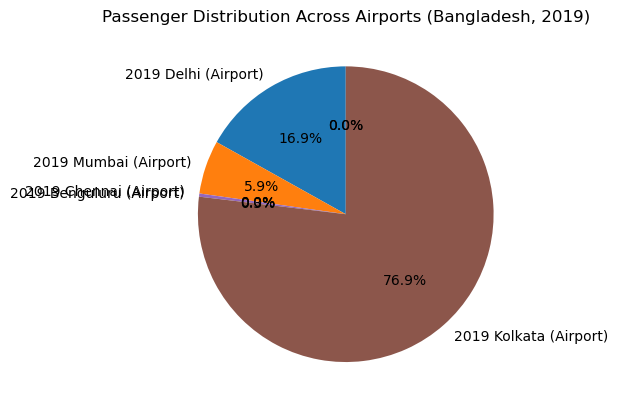

The value in the specified cell is: 2577727


In [26]:
# Find the country with the maximum visitors in 2020
# Find the row index of the country with the maximum visitors in 2020
top_country_row = cyv['2019'].idxmax()

# Extract the country with the maximum visitors
top_country = cyv.loc[top_country_row, 'Country']

# Extract data for Canada (or the identified top country)
Topcountry_2019 = neww_cairp[neww_cairp['Country'] == top_country].filter(like='2019').iloc[0]

# Plot the pie chart
Topcountry_2019.plot(kind='pie', autopct='%1.1f%%', labels=Topcountry_2019.index, startangle=90)
plt.title(f'Passenger Distribution Across Airports ({top_country}, 2019)')
plt.ylabel('')  # Remove default ylabel
plt.show()
value = cyv.loc[cyv['Country'] == top_country, '2019'].values[0]

print(f"The value in the specified cell is: {value}")

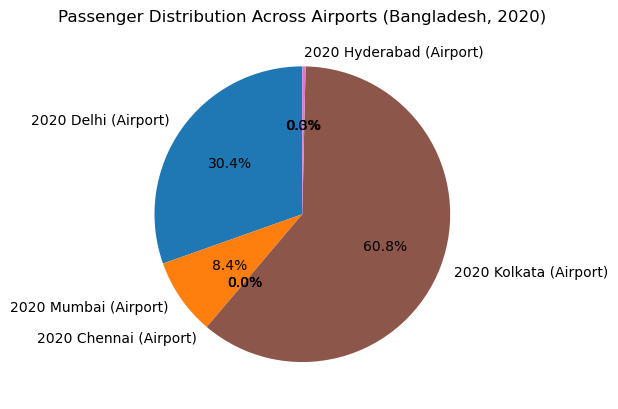

The value in the specified cell is: 549273


In [27]:
# Find the country with the maximum visitors in 2020
#top_country = cyv.loc[cyv['Country'].idxmax(), 'Country']
# Find the row index of the country with the maximum visitors in 2020
top_country_row = cyv['2020'].idxmax()

# Extract the country with the maximum visitors
top_country = cyv.loc[top_country_row, 'Country']

# Extract data for Canada (or the identified top country)
Topcountry_2020 = neww_cairp[neww_cairp['Country'] == top_country].filter(like='2020').iloc[0]

# Plot the pie chart
Topcountry_2020.plot(kind='pie', autopct='%1.1f%%', labels=Topcountry_2020.index, startangle=90)
plt.title(f'Passenger Distribution Across Airports ({top_country}, 2020)')
plt.ylabel('')
# Remove default ylabel
plt.show()
value = cyv.loc[cyv['Country'] == top_country, '2020'].values[0]

print(f"The value in the specified cell is: {value}")

*** ***

## **Time Series Forecasting**

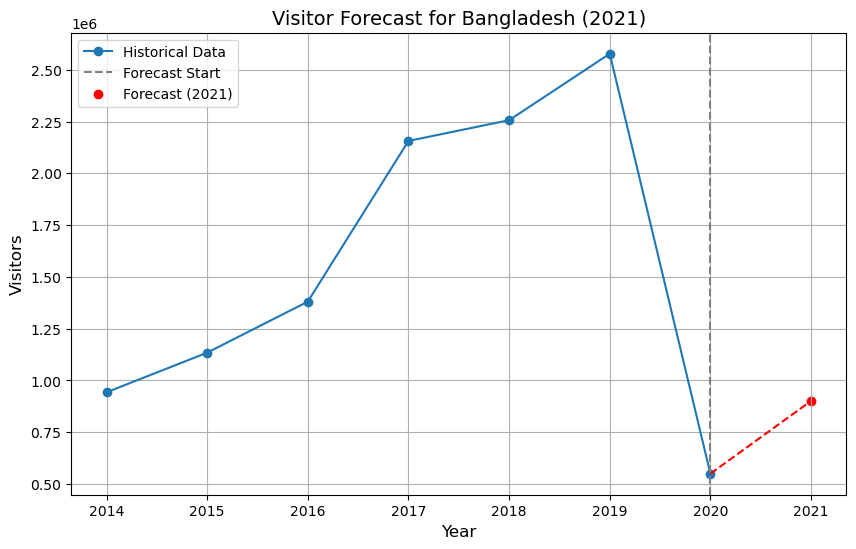

The forecasted number of visitors for Bangladesh in 2021 is: 900859


In [30]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="statsmodels")
# Select a specific country for forecasting
country = "Bangladesh"  # Replace with the desired country
country_data = cyv[cyv['Country'] == country].iloc[0, 1:]  # Exclude the 'Country' column

# Convert the data into a time series format
time_series = country_data.astype(int)
time_series.index = pd.Index(range(2014, 2021))  # Adjust the range to match your years

# Fit the ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Forecast for 2021
forecast = model_fit.forecast(steps=1)
forecast_value = forecast.iloc[0]

# Visualize the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, marker='o', label="Historical Data")
plt.axvline(x=2020, color="gray", linestyle="--", label="Forecast Start")
plt.scatter([2021], [forecast_value], color='red', label="Forecast (2021)")
plt.plot([2020, 2021], [time_series.iloc[-1], forecast_value], color='red', linestyle="--")
plt.title(f"Visitor Forecast for {country} (2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Visitors", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Print the forecast value
print(f"The forecasted number of visitors for {country} in 2021 is: {forecast_value:.0f}")

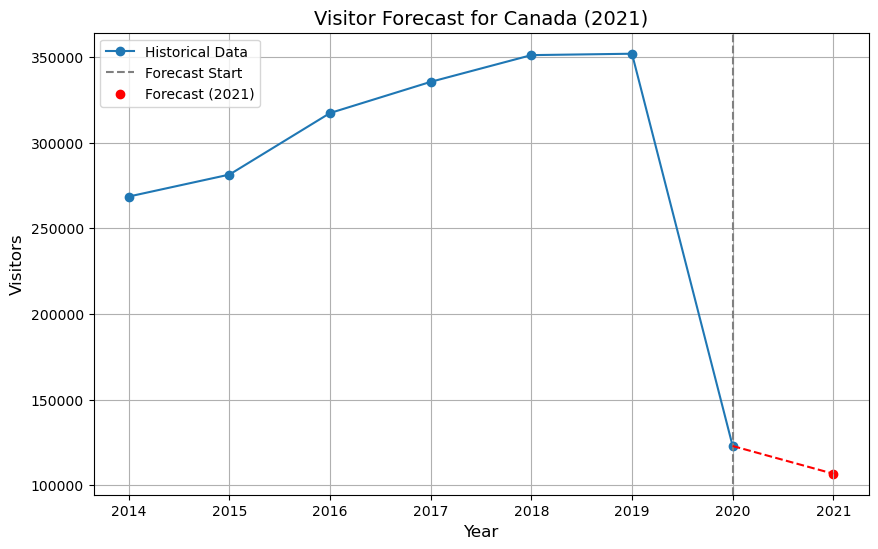

The forecasted number of visitors for Canada in 2021 is: 106682


In [31]:
# Select a specific country for forecasting
country = "Canada"  # Replace with the desired country
country_data = cyv[cyv['Country'] == country].iloc[0, 1:]  # Exclude the 'Country' column

# Convert the data into a time series format
time_series = country_data.astype(int)
time_series.index = pd.Index(range(2014, 2021))  # Adjust the range to match your years

# Fit the ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Forecast for 2021
forecast = model_fit.forecast(steps=1)
forecast_value = forecast.iloc[0]

# Visualize the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, marker='o', label="Historical Data")
plt.axvline(x=2020, color="gray", linestyle="--", label="Forecast Start")
plt.scatter([2021], [forecast_value], color='red', label="Forecast (2021)")
plt.plot([2020, 2021], [time_series.iloc[-1], forecast_value], color='red', linestyle="--")
plt.title(f"Visitor Forecast for {country} (2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Visitors", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Print the forecast value
print(f"The forecasted number of visitors for {country} in 2021 is: {forecast_value:.0f}")

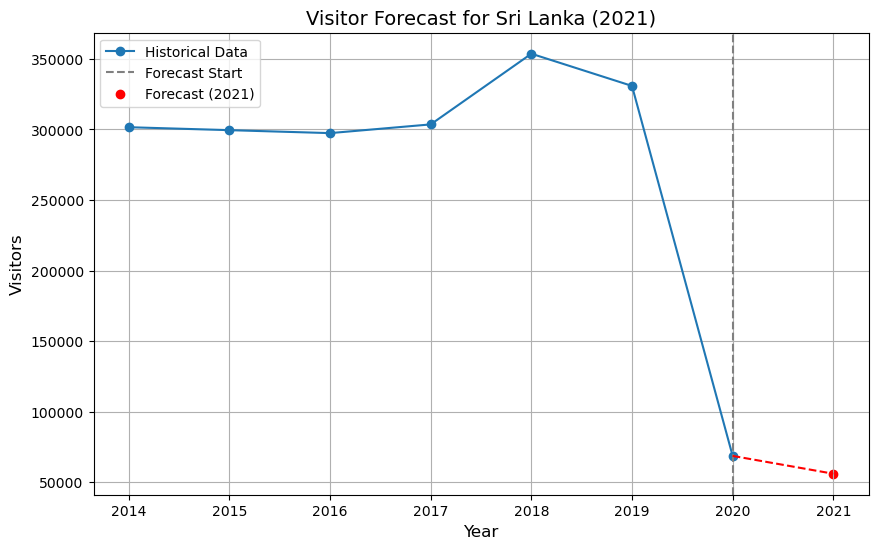

The forecasted number of visitors for Sri Lanka in 2021 is: 56025


In [32]:
# Select a specific country for forecasting
country = "Sri Lanka"  # Replace with the desired country
country_data = cyv[cyv['Country'] == country].iloc[0, 1:]  # Exclude the 'Country' column

# Convert the data into a time series format
time_series = country_data.astype(int)
time_series.index = pd.Index(range(2014, 2021))  # Adjust the range to match your years

# Fit the ARIMA model
model = ARIMA(time_series, order=(1, 1, 1))  # Adjust the order as needed
model_fit = model.fit()

# Forecast for 2021
forecast = model_fit.forecast(steps=1)
forecast_value = forecast.iloc[0]

# Visualize the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series, marker='o', label="Historical Data")
plt.axvline(x=2020, color="gray", linestyle="--", label="Forecast Start")
plt.scatter([2021], [forecast_value], color='red', label="Forecast (2021)")
plt.plot([2020, 2021], [time_series.iloc[-1], forecast_value], color='red', linestyle="--")
plt.title(f"Visitor Forecast for {country} (2021)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Visitors", fontsize=12)
plt.legend()
plt.grid()
plt.show()

# Print the forecast value
print(f"The forecasted number of visitors for {country} in 2021 is: {forecast_value:.0f}")


*** ***

## **Year-Wise and Airport-Wise Distribution of Total Visitors to India**

In [35]:
neww_cairp1 = neww_cairp.copy()

# Melt the dataframe to reshape it into a long format
melted_df = pd.melt(
    neww_cairp1,
    id_vars=["Country"],  # Keep 'Country' as an identifier
    var_name="Airport-Year",  # Name for the combined variable column
    value_name="Passengers"  # Name for the value column
)

# Extract 'Year' and 'Airport' from 'Airport-Year'
melted_df[['Year', 'Airport']] = melted_df['Airport-Year'].str.extract(r'(\d{4}) (.+)')

# Drop the original 'Airport-Year' column as it is no longer needed
melted_df = melted_df.drop(columns=['Country','Airport-Year'])

# Pivot the data to make 'Year' columns and 'Airport' rows
heatmap_data = melted_df.pivot_table(
    index='Airport',  # Rows are the airports
    columns='Year',  # Columns are the years
    values='Passengers',  # Values are the passenger counts
    aggfunc='sum'  # If duplicates exist, aggregate by summing
).reset_index()

# Reset column names to remove the "Year" multi-index level created by pivot
heatmap_data.columns.name = None

In [36]:
heatmap_data

,Airport,2014,2015,2016,2017,2018,2019,2020
0,Benguluru (Airport),371396.534,424849.089,310387.511,327121.776,346998.633,438642.420,100841.542
1,Calicut (Airport),1975.400,1891.400,55.700,54.800,46.300,34.100,52.750
2,Chennai (Airport),412.200,453.400,411.200,394.700,388.300,385.100,333.600
3,Cochin (Airport),0.000,0.000,178096.734,208274.240,189788.744,233942.489,39767.661
4,Delhi (Airport),1064849.816,1072067.187,1482841.627,1794818.838,1943714.500,1890743.559,599389.249
5,Hyderabad (Airport),943182.012,1068455.909,109332.308,113544.042,117948.720,200959.423,41361.398
6,Kolkata (Airport),112595.722,125380.731,291896.119,397565.726,475304.653,882550.468,164962.800
7,Mumbai (Airport),200977.309,232053.956,815944.178,851915.908,893480.023,1089264.237,234006.631


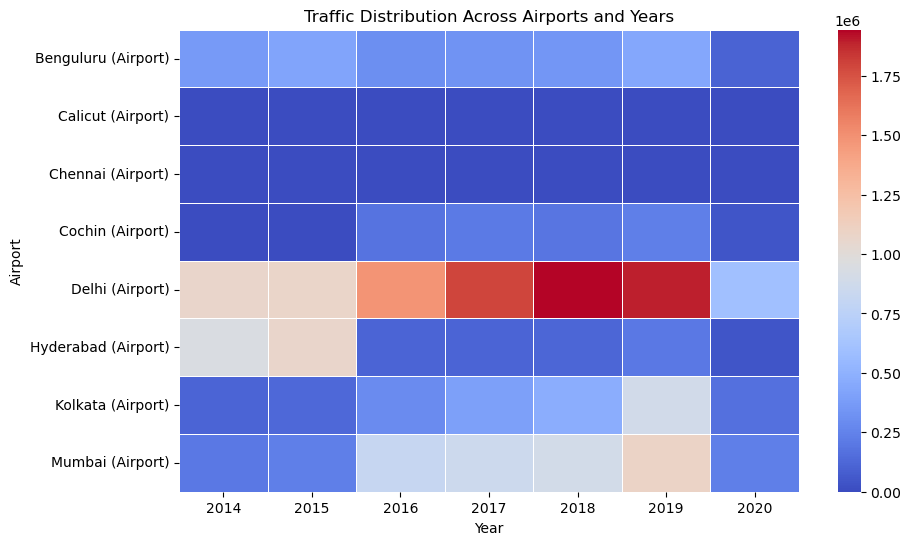

In [37]:
# Convert the data dictionary into a DataFrame
df = pd.DataFrame(heatmap_data)

# Set the 'Airport' column as the index
df.set_index("Airport", inplace=True)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=False, cmap="coolwarm", fmt="g", linewidths=0.5)

# Add labels and title
plt.title("Traffic Distribution Across Airports and Years")
plt.xlabel("Year")
plt.ylabel("Airport")

# Display the heatmap
plt.show()

*** ***